# DSCI 303 - Project 02

### Samuel Risenhoover

**Due Tuesday, June 2nd, at 11:59 PM

In [6]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

## Part A: Stock Simulation Function

This section will simulate the price of a stock over a set number of days. The parameters for the funtion are start, rate, vol, and days. These represent the current price of the stock, the annual yield rate of the stock, the annual volatility, and the number of days that will be simulated into the future respectively. 

In [7]:
def simulate_stock(start, rate, vol, days):
    
    
    daily_yields = np.random.normal(loc = (rate/252), scale = (vol/(252**0.5)), size = days)
    
    cumulative_yields = np.cumsum(daily_yields)
    
    daily_multipliers = np.exp(cumulative_yields)
    
    daily_prices = start * daily_multipliers
    
    simulated_prices = np.concatenate(([start], daily_prices))
    
    return np.round(simulated_prices,2)

Below we will test the above funtion, by simulating 60 days into the future with a starting price of 500, a rate of 8%, and a volatility of 0.3.

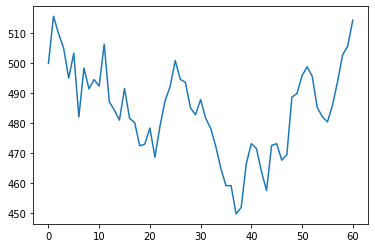

In [8]:
np.random.seed(1)
prices = simulate_stock(500, 0.08, 0.3, 60)

plt.plot(range(0,61), prices)
plt.show()



## Part B: Annual Yield Function

This funtion will calculate the annual yield of a simulated run. The funtion will utilize the function above to simulate the run parameter. 

In [7]:
def find_yield(run):
    
    temp = run[len(run) -1] / run[0]
    top = mt.log(temp)
    bottom = (252 / (len(run) -1 ))
    annual_yield = top * bottom
    
    
    
    return round(annual_yield, 4)
    
    

Below we will test the funtion with the previously simulated run, with a random seed of 1. The correct answer should be 0.1196.

In [9]:
print(find_yield(prices))

0.1196


In the next cell we will demostrate the funtion by running 25 simulations with a starting price of 100, an expected yield of 6%, a volatility of 0.4, and a run length of 25 days. Each run will be plotted as a line plot and the calculated annual yields will be stored in a list.

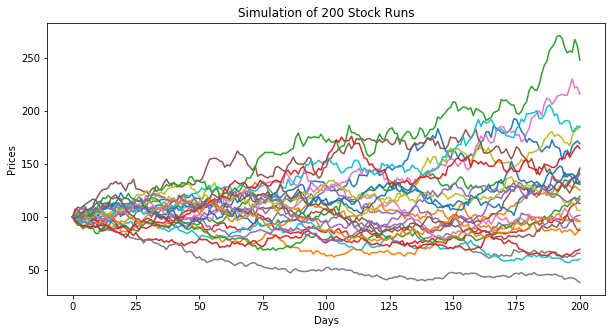

In [10]:
plt.figure(figsize = [10,5])

simulated_yields = []
for i in range(0,26):
    sp = simulate_stock(100, 0.06, 0.4, 200)
    sy = find_yield(sp)
    simulated_yields.append(sy)
    plt.plot(range(0,201), sp)

plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('Simulation of 200 Stock Runs')
plt.show()
        
    

The next cell will display the yield rates for the runs generated above.

In [7]:
print(simulated_yields)

[0.6611, 0.2836, 0.3501, 0.1506, 0.0198, 0.3635, 0.9697, -0.5283, 0.7798, -0.6351, 0.4319, -0.1446, 0.2234, -0.4586, 0.4608, 0.4768, -0.0479, -1.2092, 0.0748, 0.7724, 0.3386, -0.0558, 1.1441, 0.6283, 0.1978, -0.1716]


## Part C: Finding Seeds that Generate Specific Outcomes

The below cells will simulate three different stocks over a period of 100 days. The purpose of this is to investigate different seed values and examine their influence over the results of the simulation.

In the cell below, Stock A has the highest simulated final price.

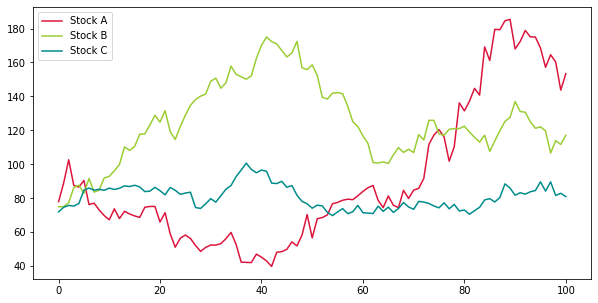

In [8]:
np.random.seed(2000)
plt.figure(figsize = [10,5])

stock_A = simulate_stock(78, 0.04, 1.2, 100)
stock_B = simulate_stock(75, 0.08, 0.8, 100)
stock_C = simulate_stock(72, 0.16, 0.6, 100)

plt.plot(range(0,101), stock_A, c = 'crimson', label = 'Stock A')
plt.plot(range(0,101), stock_B, c = 'yellowgreen' ,label = 'Stock B')
plt.plot(range(0,101), stock_C, c = 'darkcyan', label = 'Stock C')

plt.legend()
plt.show()

In the cell below, Stock B has the highest simulated final price.

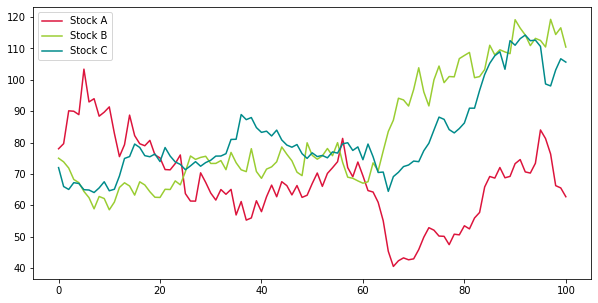

In [9]:
np.random.seed(709)
plt.figure(figsize = [10,5])


stock_A = simulate_stock(78, 0.04, 1.2, 100)
stock_B = simulate_stock(75, 0.08, 0.8, 100)
stock_C = simulate_stock(72, 0.16, 0.6, 100)

plt.plot(range(0,101), stock_A, c = 'crimson', label = 'Stock A')
plt.plot(range(0,101), stock_B, c = 'yellowgreen' ,label = 'Stock B')
plt.plot(range(0,101), stock_C, c = 'darkcyan', label = 'Stock C')

plt.legend()
plt.show()

In the cell below, Stock C has the highest simulated final price.

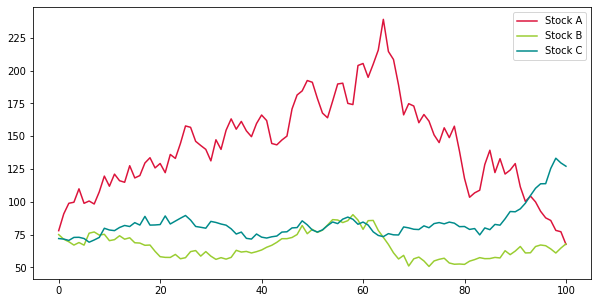

In [10]:
np.random.seed(10549)
plt.figure(figsize = [10,5])

stock_A = simulate_stock(78, 0.04, 1.2, 100)
stock_B = simulate_stock(75, 0.08, 0.8, 100)
stock_C = simulate_stock(72, 0.16, 0.6, 100)

plt.plot(range(0,101), stock_A, c = 'crimson', label = 'Stock A')
plt.plot(range(0,101), stock_B, c = 'yellowgreen' ,label = 'Stock B')
plt.plot(range(0,101), stock_C, c = 'darkcyan', label = 'Stock C')

plt.legend()
plt.show()

## Part D: Monte Carlo Simulation

The purpose of this section is to estimate probabilities relating to the simulation of stock prices, in order to get a better idea about the possible outcomes of a certain stock. 

In [11]:
def monte_carlo(start, rate, vol, days, num_runs):
    final_prices = []
    annual_yields = []
    for i in range(0, num_runs + 1):
        simulated_prices = simulate_stock(start, rate, vol, days)
        
        temp = simulated_prices[len(simulated_prices) - 1]
        final_prices.append(temp)
        annual_yields.append(find_yield(simulated_prices))
        
    return( np.array(final_prices), np.array(annual_yields))
        

Below the funtion will be tested with a controlled seed value of 1.

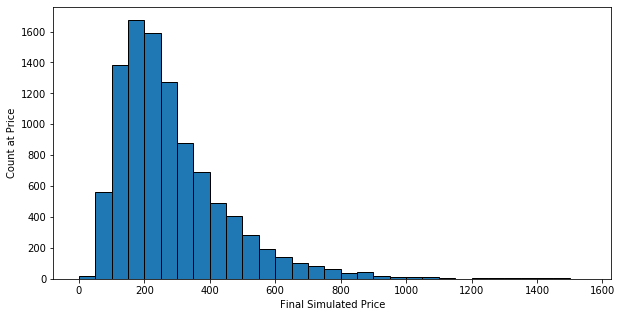

In [12]:
np.random.seed(1)

plt.figure(figsize = [10,5])

fp, ay = monte_carlo(200, 0.1, 0.4, 500, 10000)

plt.hist(fp, edgecolor = 'k', bins = np.arange(0, 1600, 50))

plt.xlabel('Final Simulated Price')
plt.ylabel('Count at Price')
plt.show()



Below the 10th, 25th, 50th, 75th, and 90th percentiles of the Monte Carlo simulation will be displayed.

In [13]:
percentiles = np.array([10, 25, 50, 75, 90])

for i in range(0, len(percentiles)):
    
    temp = np.percentile(fp, percentiles[i])
    
    print(str(percentiles[i]) + 'th percentile: ' + str(round(temp, 2)))


10th percentile: 118.05
25th percentile: 165.57
50th percentile: 242.95
75th percentile: 357.53
90th percentile: 505.91


## Part E: Effects of Volatility

The purpose of this section is to examine the effects of volatility on two Monte Carlo simulations, where all other parameters will be held equal. 

In [14]:
np.random.seed(1)

afp, aay = monte_carlo(100, 0.12, 0.3, 150, 10000)
bfp, bay = monte_carlo(100, 0.12, 0.7, 150, 10000)

mean_aay = round(np.mean(aay), 4)
mean_bay = round(np.mean(bay), 4)

print("Average Annual Yield for A over 10000 runs: " + str(mean_aay) +
      "\nAverage Annual Yield for B over 10000 runs: " + str(mean_bay))

Average Annual Yield for A over 10000 runs: 0.1218
Average Annual Yield for B over 10000 runs: 0.1128


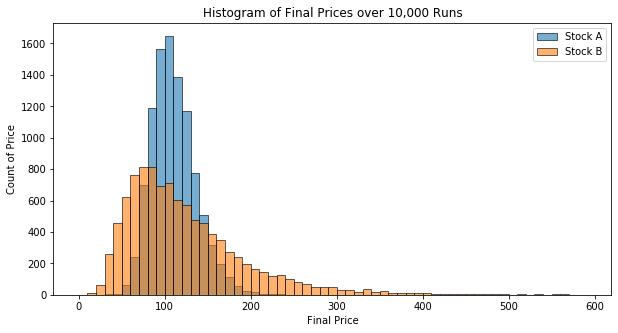

In [15]:
plt.figure(figsize = [10,5])

plt.hist(afp, bins = np.arange(0, 600, 10), alpha = 0.6, edgecolor = 'k', label = 'Stock A')
plt.hist(bfp, bins = np.arange(0, 600, 10), alpha = 0.6, edgecolor = 'k', label = 'Stock B')

plt.legend()
plt.title('Histogram of Final Prices over 10,000 Runs')
plt.xlabel('Final Price')
plt.ylabel('Count of Price')

plt.show()

## Part F: Comparing Two Stocks

This section will be comparing the performance of two stocks with different parameters, and the make observations about those two particular stocks.

In [16]:
np.random.seed(1)

afp2, aay2 = monte_carlo(120, 0.08, 0.2, 252, 10000)
bfp2, bay2 = monte_carlo(120, 0.05, 0.5, 252, 10000)

p_a_over_b    = round(np.mean(afp2 > bfp2), 4)
p_a_over_150  = round(np.mean(afp2 > 150), 4)
p_b_over_150  = round(np.mean(bfp2 > 150), 4)
p_a_under_100 = round(np.mean(afp2 < 100), 4)
p_b_under_100 = round(np.mean(bfp2 < 100), 4)


print("Proportions of runs in which..." +
      "\n-------------------------------"+
      "\nA ends above B:   " + str(p_a_over_b) +
      "\n" +
      "\nA ends above 150: " + str(p_a_over_150) + 
      "\nB ends above 150: " + str(p_b_over_150) +
      "\n" +
      "\nA ends below 100: " + str(p_a_under_100) +
      "\nB ends below 100: " + str(p_b_under_100))



Proportions of runs in which...
-------------------------------
A ends above B:   0.5235

A ends above 150: 0.2338
B ends above 150: 0.3619

A ends below 100: 0.095
B ends below 100: 0.3195


## Part G: Expected Call Payoff

This section will utilize a Monte Carlo simulation and apply it a call option, and simulate the payouts for a call option with a strike price of 225. 

In [17]:
S, simy = monte_carlo(200, 0.11, 0.4, 150, 10000)
K = 225

profits = S - K

profits[profits < 0] = 0

average_payoff = np.mean(profits)

print(round(average_payoff,2))


26.54
